In [ ]:
!pip install opencv-python==3.4.2.17

In [ ]:
!pip install opencv-contrib-python==3.4.2.17

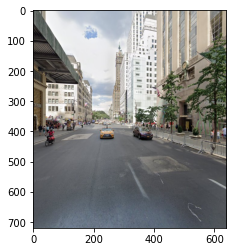

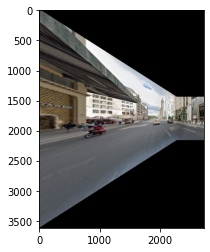

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#
img1 = cv2.imread("trump_tower_1.png")
img2 = cv2.imread("trump_tower_2.png")
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# plt.show()


img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img

all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))
def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    # plt.show()
    cv2.imwrite("trump_12.png",result)

#####################################


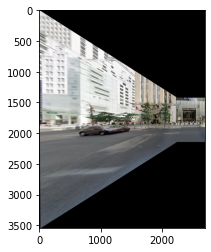

In [ ]:
img1 = cv2.imread("trump_tower_2.png")
img2 = cv2.imread("trump_tower_3.png")

# plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# plt.show()


img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img

all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))
def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("trump_23.png",result)


####################


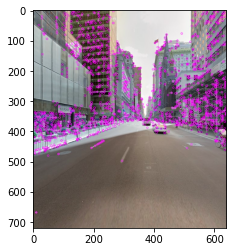

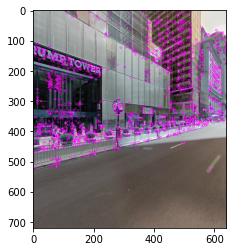

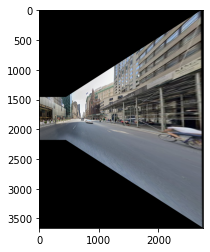

In [ ]:
img1 = cv2.imread("trump_tower_5.png")
img2 = cv2.imread("trump_tower_4.png")

# plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# plt.show()


img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
plt.show()
plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
plt.show()
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img

all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))
def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("trump_45.png",result)


####################

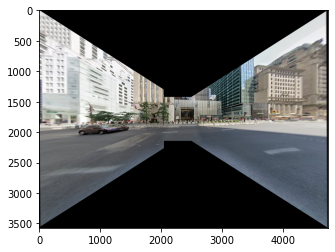

In [ ]:
img1 = cv2.imread("trump_23.png")
img2 = cv2.imread("trump_34.png")

# plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# plt.show()


img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img

all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))
def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("trump_234.png",result)


####################

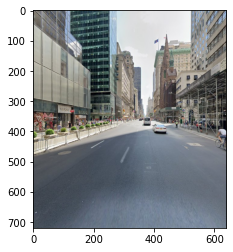

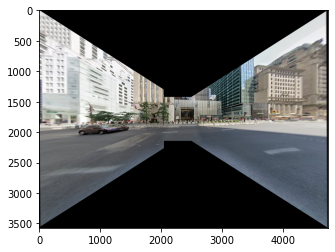

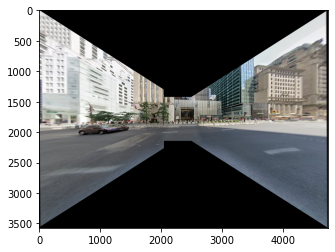

In [ ]:

img1 = cv2.imread("trump_tower_5.png")
img2 = cv2.imread("trump_234.png")

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2, k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img


all_matches = []
for m, n in matches:
    all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))


def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("trump_2345.png", result)



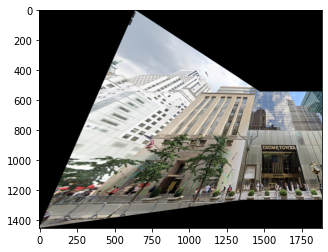

In [ ]:

img1 = cv2.imread("trump_tower_6.png")
img2 = cv2.imread("trump_tower_7.png")

# plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
# plt.show()

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2, k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img


all_matches = []
for m, n in matches:
    all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))


def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("trump_67.png", result)



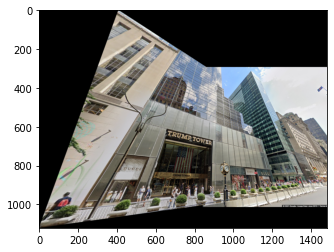

In [ ]:
################################################33
img1 = cv2.imread("trump_tower_7.png")
img2 = cv2.imread("trump_tower_8.png")

# plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# plt.show()


img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img

all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))
def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("trump_78.png",result)


####################


hello
hello
hello
vmsdn,vn


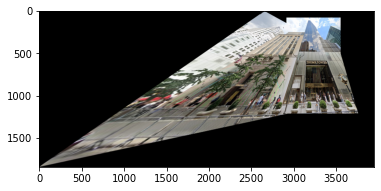

In [ ]:

img1 = cv2.imread("trump_67.png")
img2 = cv2.imread("trump_tower_9.png")
print("hello")
# plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
# plt.show()

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2, k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img


all_matches = []
for m, n in matches:
    all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)
print("hello")
# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))


def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    print("hello")
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    # plt.show()
    cv2.imwrite("trump_679.png", result)
    # print("vmsdn,vn")

###############################################


hello
hello
hello


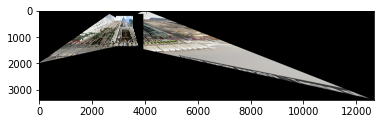

In [ ]:

img1 = cv2.imread("trump_tower_8.png")
img2 = cv2.imread("trump_679.png")
print("hello")
# plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
# plt.show()

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2, k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img


all_matches = []
for m, n in matches:
    all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)
print("hello")
# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))


def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    print("hello")
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    # plt.show()
    cv2.imwrite("trump_6789.png", result)
    # print("vmsdn,vn")

###############################################


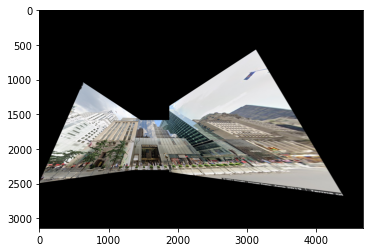

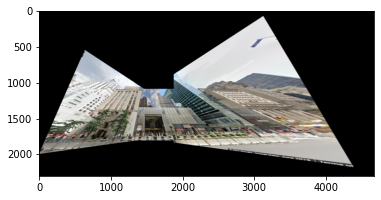

In [ ]:

img1 = cv2.imread("trump_78.png")
img2 = cv2.imread("trump_67.png")

# plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# plt.show()


img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img

all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))
def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    
    # left = 0
    # top = 0
    # right = 1550
    # bottom = 0
 
# Cropped image of above dimension
# (It will not change original image)
    
    result = result[500:2800, 0:result.shape[1]]
    # cv2.imshow("cropped", crop_img)
    # cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    
    cv2.imwrite("trump_678.png",result)

####################


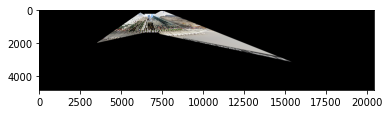

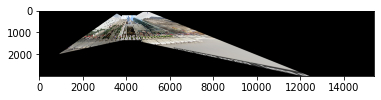

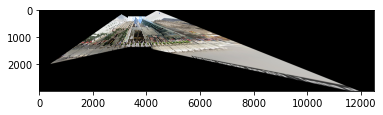

In [ ]:

img1 = cv2.imread("trump_678.png")
img2 = cv2.imread("trump_tower_9.png")

# plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
# plt.figure()
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
# plt.show()

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2, k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img


all_matches = []
for m, n in matches:
    all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))


def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.show()
    result = result[0:3000, 2600:18000]
    # cv2.imshow("cropped", crop_img)
    # cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    result = result[0:result.shape[0], 500:13000]
    # cv2.imshow("cropped", crop_img)
    # cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("trump_6789.png", result)


##################################################


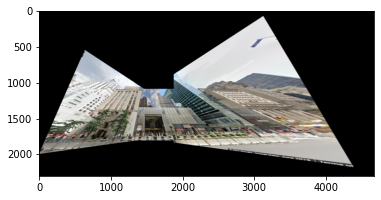

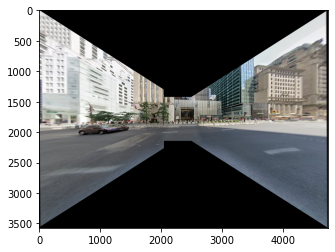

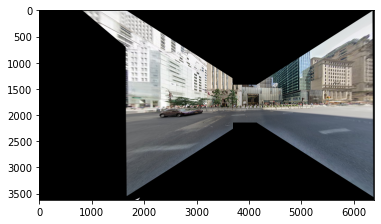

In [ ]:

img1 = cv2.imread("trump_678.png")
img2 = cv2.imread("trump_234.png")

plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()


img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plt.imshow(img1_gray)
# plt.imshow(img2_gray)

orb = cv2.xfeatures2d.SIFT_create(nfeatures=2000)

# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# plt.imshow(cv2.drawKeypoints(img1, keypoints1, None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 255)))
# bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
bf = cv2.BFMatcher()
# Find matching points
matches = bf.knnMatch(descriptors1, descriptors2,k=2)


def draw_matches(img1, keypoints1, img2, keypoints2, matches):
    r, c = img1.shape[:2]
    r1, c1 = img2.shape[:2]

    # Create a blank image with the size of the first image + second image
    output_img = np.zeros((max([r, r1]), c + c1, 3), dtype='uint8')
    output_img[:r, :c, :] = np.dstack([img1, img1, img1])
    output_img[:r1, c:c + c1, :] = np.dstack([img2, img2, img2])

    # Go over all of the matching points and extract them
    for match in matches:
        img1_idx = match.queryIdx
        img2_idx = match.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt

        # Draw circles on the keypoints
        cv2.circle(output_img, (int(x1), int(y1)), 4, (0, 255, 255), 1)
        cv2.circle(output_img, (int(x2) + c, int(y2)), 4, (0, 255, 255), 1)

        # Connect the same keypoints
        cv2.line(output_img, (int(x1), int(y1)), (int(x2) + c, int(y2)), (0, 255, 255), 1)

    return output_img

all_matches = []
for m, n in matches:
  all_matches.append(m)

img3 = draw_matches(img1_gray, keypoints1, img2_gray, keypoints2, all_matches[:30])
# plt.imshow(img3)

good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

# plt.imshow(cv2.drawKeypoints(img1, [keypoints1[m.queryIdx] for m in good], None, (255, 0, 255)))
# plt.imshow(cv2.drawKeypoints(img2, [keypoints2[m.trainIdx] for m in good], None, (255, 0, 255)))
def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0, 0], [0, rows1], [cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
    temp_points = np.float32([[0, 0], [0, rows2], [cols2, rows2], [cols2, 0]]).reshape(-1, 1, 2)

    # When we have established a homography we need to warp perspective
    # Change field of view
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)

    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]

    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

    output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max - x_min, y_max - y_min))
    output_img[translation_dist[1]:rows1 + translation_dist[1], translation_dist[0]:cols1 + translation_dist[0]] = img1

    return output_img


MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
    # Convert keypoints to an argument for findHomography
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Establish a homography
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    result = warpImages(img2, img1, M)

    # cv2_imshow(result)

    plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite("trump_234678.png",result)
